# What do your blood sugars tell you?

## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.


## 💾 The data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

## What research tells us
### Pregnancies 
According to a post from Cleveland Clinic, a type of diabetes, called Gestational Diabetes, develops when a woman is pregnant and typically occurs when blood sugar levels get too high. The reason that this happens is that the hormones from the placenta blocks the ability to either use or make insulin.
### Glucose
### BMI
Note that BMI is a way to quantify the body's weight in relation to its height. Its formula is:
$$ BMI = weight (kg) / (height (m))^2 $$

## Skin Thickness
Skin thickness can indeed be an indicator of diabetes, particularly in relation to certain skin conditions and measurements. Research has shown that increased skin thickness is associated with diabetes, especially in individuals with insulin-dependent diabetes mellitus (IDDM). In a study, skin thickness was found to correlate significantly with the duration of diabetes, glycemic control, and the presence of complications such as retinopathy and cheiroarthropathy
## References:
https://my.clevelandclinic.org/health/diseases/9012-gestational-diabetes
https://pubmed.ncbi.nlm.nih.gov/2721339/
## Using data
Since we know that there are people who cant get pregnant, so we cant really use the pregnancies column in using predictive model. There is also no indicator whether the row of the data set is a person that is capable of being pregnant.



In [7]:
import pandas as pd

data = pd.read_csv('data/diabetes.csv')
# Display the first few rows of the DataFrame
print("Length of data:", len(data))
data.head()

Length of data: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Visualizing the data distribution of glucose

C:\Users\jacob\AppData\Local\Temp\ipykernel_8652\2349065707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])


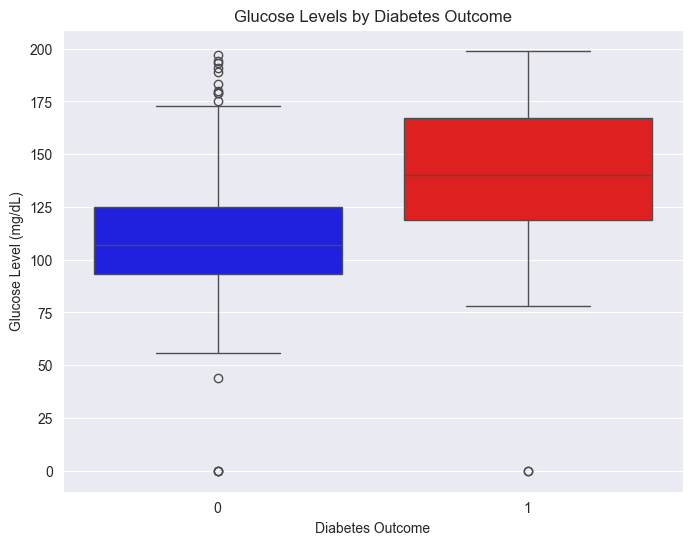

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()


#### Visualizing the age distribution

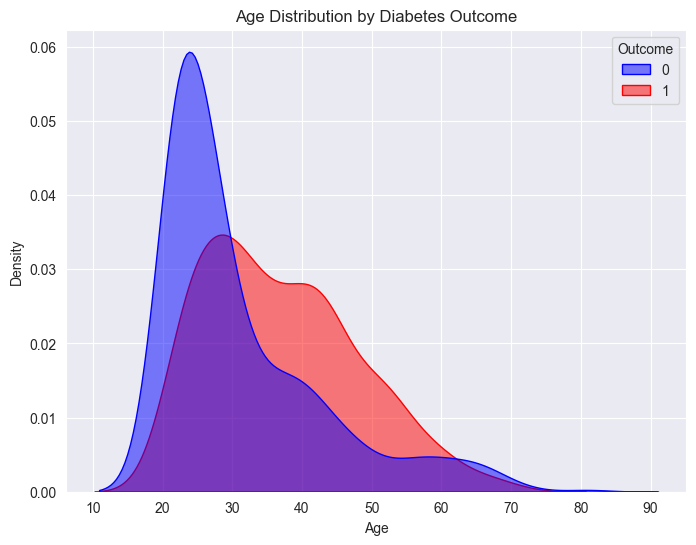

In [3]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


Text(0.5, 0, 'Number of Pregnancies')

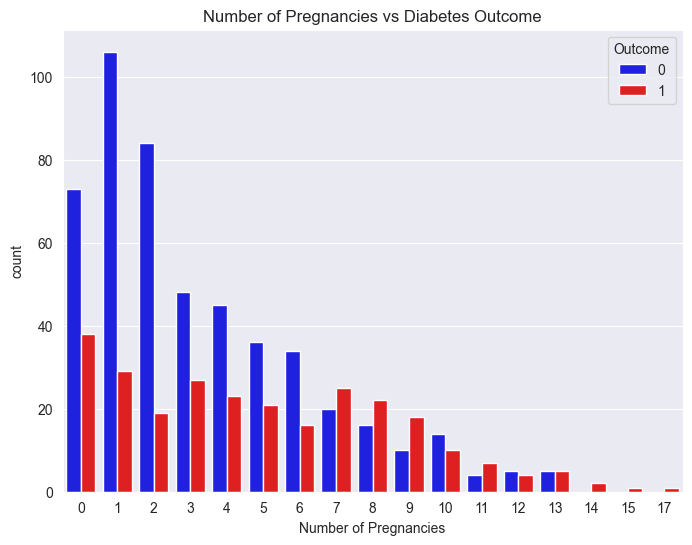

In [4]:
# number of pregnancies vs outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=data, palette=["blue", "red"])
plt.title("Number of Pregnancies vs Diabetes Outcome")
plt.xlabel("Number of Pregnancies")

In [5]:
# checking for null values
def check_null_values(df):
    print(f"Total null values: {df.isnull().sum().sum()}")
    if df.isnull().sum().sum() > 0:
        print("Null values in the following columns:")
        print(df[df.isnull().sum() > 0].columns)
    else:
        print("No null values found.")

check_null_values(data)

Total null values: 0
No null values found.


In [8]:
features = ["BMI", 'Age', 'Glucose']
X = data[features]
target = "Outcome"
y = data[target]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


TypeError: got an unexpected keyword argument 'cv'

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [14]:
# using SVM
from sklearn.svm import SVC

svm = SVC(kernel='sigmoid', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(y_pred[:5])

[0 0 0 0 0]


## 💪 Competition challenge

In this challenge, you will focus on the following key tasks:

- Determine the most important factors affecting the diabetes outcome.
- Create interactive plots to visualize the relationship between diabetes and the determined factors from the previous step.
- What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?

## 🧑‍⚖️ Judging criteria

This is a community-based competition. Once the competition concludes, you'll have the opportunity to view and vote for the best submissions of others as the voting begins. The top 5 most upvoted entries will win. The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!